# (Exploration of Flight Data)
## by (Reem Abdulaziz)

## Preliminary Wrangling

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset 
df = pd.read_csv("flights.csv")

In [3]:
df.shape

(607346, 32)

### What is the structure of your dataset?

> There are 607346 flights in the datset. With 32 distinguishing features associated with each flight 



In [4]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 31
0,2020,1,1,1,3,2020-01-01,N951WN,ONT,SFO,1810,...,95.0,122.0,74.0,363.0,8.0,0.0,27.0,0.0,33.0,NaN
1,2020,1,1,1,3,2020-01-01,N467WN,ONT,SFO,1150,...,90.0,92.0,71.0,363.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,1,3,2020-01-01,N7885A,ONT,SJC,2020,...,70.0,68.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,1,3,2020-01-01,N551WN,ONT,SJC,1340,...,75.0,75.0,63.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,1,3,2020-01-01,N968WN,ONT,SJC,915,...,80.0,67.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN


### Columns datatype:


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 607346 non-null  int64  
 1   QUARTER              607346 non-null  int64  
 2   MONTH                607346 non-null  int64  
 3   DAY_OF_MONTH         607346 non-null  int64  
 4   DAY_OF_WEEK          607346 non-null  int64  
 5   FL_DATE              607346 non-null  object 
 6   TAIL_NUM             606648 non-null  object 
 7   ORIGIN               607346 non-null  object 
 8   DEST                 607346 non-null  object 
 9   CRS_DEP_TIME         607346 non-null  int64  
 10  DEP_TIME             600682 non-null  float64
 11  DEP_DELAY            600647 non-null  float64
 12  DEP_DEL15            600647 non-null  float64
 13  TAXI_OUT             600524 non-null  float64
 14  TAXI_IN              600271 non-null  float64
 15  CRS_ARR_TIME     

In [6]:
#check fot null values
df.isna().sum()

YEAR                        0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
TAIL_NUM                  698
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                 6664
DEP_DELAY                6699
DEP_DEL15                6699
TAXI_OUT                 6822
TAXI_IN                  7075
CRS_ARR_TIME                0
ARR_TIME                 7075
ARR_DELAY                8078
ARR_DEL15                8078
CANCELLED                   0
CANCELLATION_CODE      600418
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME      8078
AIR_TIME                 8078
DISTANCE                    0
CARRIER_DELAY          525061
WEATHER_DELAY          525061
NAS_DELAY              525061
SECURITY_DELAY         525061
LATE_AIRCRAFT_DELAY    525061
Unnamed: 31            607346
dtype: int64

# Data cleaning

### 1- drop unnecessury columns

In [7]:
df.drop(['TAXI_OUT', 'TAXI_IN','DEP_DEL15', 'ARR_DEL15','TAIL_NUM'], inplace=True, axis = 1)

### 2- Delete unnamed cells.

In [8]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

### 3-DEP_Time, CRS_DEP_Time, ARR_Time, AIR_TIME and CRS_ARR_TIME columns need to change thier datatype to local, hhmm.

In [9]:
Time=['DEP_TIME','CRS_DEP_TIME','ARR_TIME']
#change null values into 9999 
values = {'DEP_TIME': 9999, 'CRS_DEP_TIME': 9999, 'ARR_TIME': 9999}
df.fillna(value=values, inplace=True)

In [10]:
df[Time] = df[Time].astype(int).astype(str)

In [11]:
def padzero(s):
    timel = len(s)
    if timel < 4:
        add0 = 4 - timel
        return add0*'0'+s
    else:
        return s
    
for col in Time:
    df[col] = df[col].apply(lambda x: padzero(x))

In [12]:
for col in Time:
    df[col] = pd.to_datetime(df[col], format='%H%M', errors='coerce').dt.time

### 4-The null values in cancellation code if there is no cancellation should be E insted of null.

In [13]:
# Confirm that when the cancellation code is Null, a flight is cancelled, 
df[df.CANCELLED==0].CANCELLATION_CODE.unique()

array([nan], dtype=object)

In [14]:
df.CANCELLATION_CODE.value_counts(dropna=False)

NaN    600418
B        4989
A        1348
C         589
D           2
Name: CANCELLATION_CODE, dtype: int64

In [15]:
#replace NAN values with NO 
values = {'CANCELLATION_CODE': 'NO'}
df.fillna(value=values, inplace=True)

In [16]:
df.CANCELLATION_CODE.value_counts(dropna=False)

NO    600418
B       4989
A       1348
C        589
D          2
Name: CANCELLATION_CODE, dtype: int64

### 5-Replace null in numeric columns with 0

In [17]:
values = {'LATE_AIRCRAFT_DELAY':0, 'SECURITY_DELAY':0, 
          'NAS_DELAY':0, 'WEATHER_DELAY':0, 
          'CARRIER_DELAY':0,'DEP_DELAY':0, 'ARR_DELAY':0, 'AIR_TIME':0}
df.fillna(value=values, inplace=True)

### 6- replace ARR_TIME and DEP_TIME with CRS_ARR_TIME and CRS_DEP_TIME

In [18]:
values = {'ARR_TIME': df['CRS_ARR_TIME'], 'DEP_TIME': df['CRS_DEP_TIME'], 'ACTUAL_ELAPSED_TIME' :df['CRS_ELAPSED_TIME']}
df.fillna(value=values, inplace=True)

### Check if there is no null

In [19]:
df.isna().sum()

YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
FL_DATE                0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
CANCELLATION_CODE      0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64

In [20]:
# melting delays columns in one column
delay_causes=['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']
Stay_Column = [x for x in df.columns.tolist() if x not in delay_causes]

In [21]:
delayed = pd.melt(df, id_vars=Stay_Column, value_vars=delay_causes, var_name='CauseDelay', value_name='Delay')
delayed = delayed[delayed.Delay>0] # subset with causes delays time > 0 minutes
delayed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123301 entries, 0 to 3036711
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 123301 non-null  int64  
 1   QUARTER              123301 non-null  int64  
 2   MONTH                123301 non-null  int64  
 3   DAY_OF_MONTH         123301 non-null  int64  
 4   DAY_OF_WEEK          123301 non-null  int64  
 5   FL_DATE              123301 non-null  object 
 6   ORIGIN               123301 non-null  object 
 7   DEST                 123301 non-null  object 
 8   CRS_DEP_TIME         123301 non-null  object 
 9   DEP_TIME             123301 non-null  object 
 10  DEP_DELAY            123301 non-null  float64
 11  CRS_ARR_TIME         123301 non-null  int64  
 12  ARR_TIME             123301 non-null  object 
 13  ARR_DELAY            123301 non-null  float64
 14  CANCELLED            123301 non-null  float64
 15  CANCELLATION_COD

In [22]:
#change data type to category
categories_cols = ['ORIGIN', 'DEST', 'CauseDelay']

for col in categories_cols:
    delayed[col] = delayed[col].astype('category')

delayed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123301 entries, 0 to 3036711
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   YEAR                 123301 non-null  int64   
 1   QUARTER              123301 non-null  int64   
 2   MONTH                123301 non-null  int64   
 3   DAY_OF_MONTH         123301 non-null  int64   
 4   DAY_OF_WEEK          123301 non-null  int64   
 5   FL_DATE              123301 non-null  object  
 6   ORIGIN               123301 non-null  category
 7   DEST                 123301 non-null  category
 8   CRS_DEP_TIME         123301 non-null  object  
 9   DEP_TIME             123301 non-null  object  
 10  DEP_DELAY            123301 non-null  float64 
 11  CRS_ARR_TIME         123301 non-null  int64   
 12  ARR_TIME             123301 non-null  object  
 13  ARR_DELAY            123301 non-null  float64 
 14  CANCELLED            123301 non-null  float64 
 15 

#### Get all the delayed flights 

In [23]:
delayed_df = df[df['ARR_DELAY']>=15]

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in discovering the reasons for the cancelation and delays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Tha main features that i will look for is the ORIGIN , DAY_OF_WEEK , concellation and deleys columns.

## Univariate Exploration

> Here is Univariate Exploration of the dataset

## ARR_DELAY 

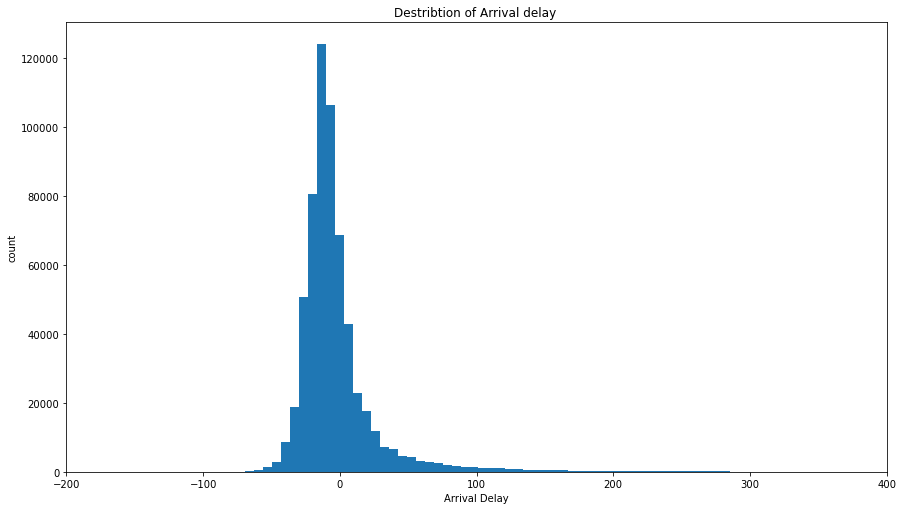

In [24]:
plt.figure(figsize=[14.70, 8.27])
plt.hist(data=df, x="ARR_DELAY", bins=400)
plt.xlabel("Arrival Delay");
plt.xlim([-200,400])
plt.title('Destribtion of Arrival delay ')
plt.ylabel('count');

> The high values isn't an outliers , there is a flights arrived before the time

## Delays reasons

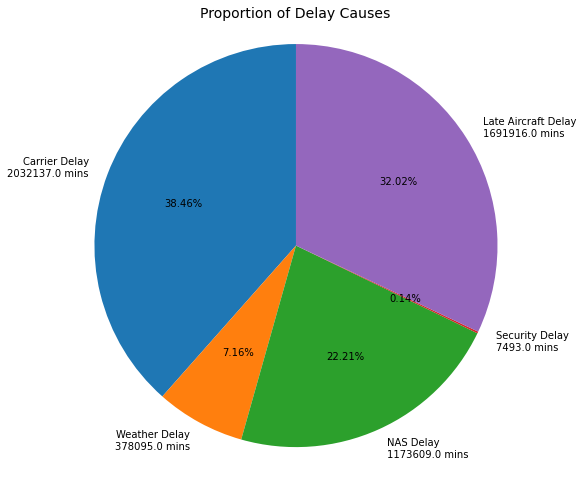

In [25]:
# Pie chart
plt.figure(figsize=[14.70, 8.27])
sizes  = [ df.CARRIER_DELAY.sum(), df.WEATHER_DELAY.sum(),df.NAS_DELAY.sum(), df.SECURITY_DELAY.sum() ,df.LATE_AIRCRAFT_DELAY.sum()]
labels = [
            'Carrier Delay\n' + str(sizes[0]) + ' mins',\
            'Weather Delay\n' + str(sizes[1]) + ' mins', \
            'NAS Delay\n' + str(sizes[2]) + ' mins',\
            'Security Delay\n' + str(sizes[3]) + ' mins',\
            'Late Aircraft Delay\n' + str(sizes[4]) + ' mins' ]     

plt.pie(sizes, autopct='%.2f%%', startangle=90,labels=labels, explode=None)
plt.axis('square')
plt.title('Proportion of Delay Causes', fontsize=14);

>This pie chart shows the proportion of of delay causes (in minutes) of each cause in the delayed flights dataset.

## Origin

In [26]:
#count cancelled and not cancelled flights
df_cancelled = df.query('(CANCELLED==1)')
df_notcancelled = df.query('(CANCELLED==0)')
print('There were {:0.0f} cancelled flights out of {:0.0f} total flights '.format(df_cancelled.shape[0], df.shape[0]))

There were 6928 cancelled flights out of 607346 total flights 


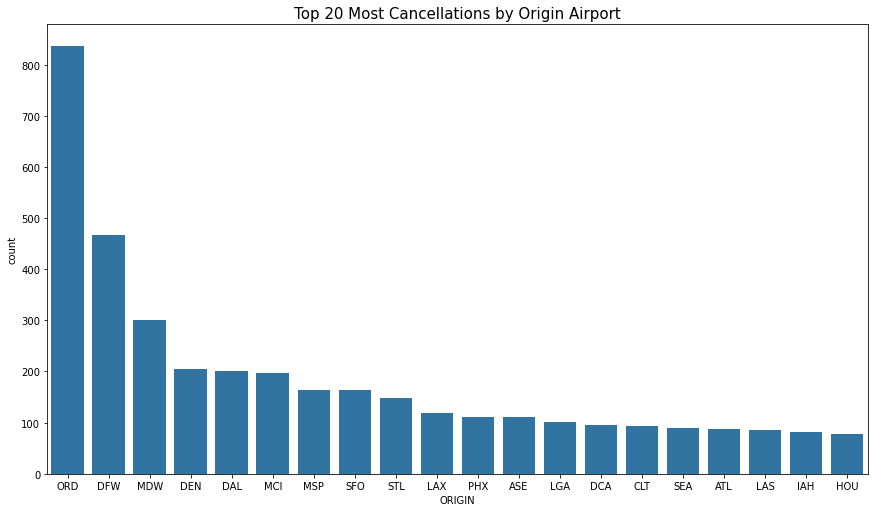

In [27]:
#check where is the most cancellation and dalyes flights
plt.figure(figsize=[14.70, 8.27]);
color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765);
top = (df_cancelled.ORIGIN.value_counts()[0:20].index)
ax = sb.countplot(data = df_cancelled[df_cancelled.ORIGIN.isin(top)], x='ORIGIN',order=top,color=color);

plt.title('Top 20 Most Cancellations by Origin Airport', fontsize=15);

> The chart shows that the most cancelled flights in ORD Airport. i will see what the most cancellation reason in each Airport specially in ORD

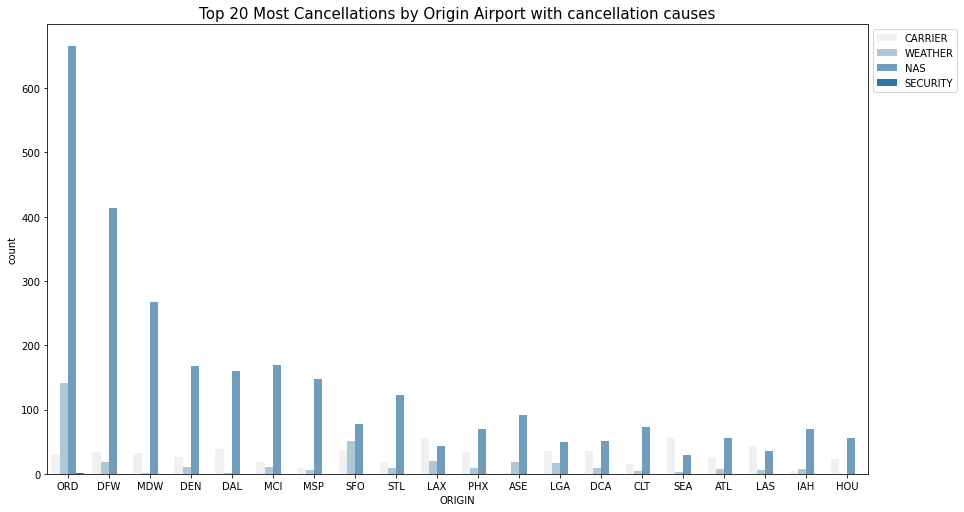

In [28]:
#check why is the most cancellation causes
plt.figure(figsize=[14.70, 8.27])

top = (df_cancelled.ORIGIN.value_counts()[0:20].index)
ax = sb.countplot(data = df_cancelled[df_cancelled.ORIGIN.isin(top)], x='ORIGIN', 
             hue= 'CANCELLATION_CODE', color = color, order=top);
plt.legend(['CARRIER','WEATHER','NAS','SECURITY','LATE AIRCRAFT'],bbox_to_anchor=(1,1))
plt.title('Top 20 Most Cancellations by Origin Airport with cancellation causes', fontsize=15);

> the most cancellation cause in ORD airport and the most og the Airports is NAS Cause.

## Bivariate Exploration

> I will try to find realtionship between:
* cancellation flights per day of week.
* Arrival Delays per Delay Causes



### Flights cancelled per each day of a week

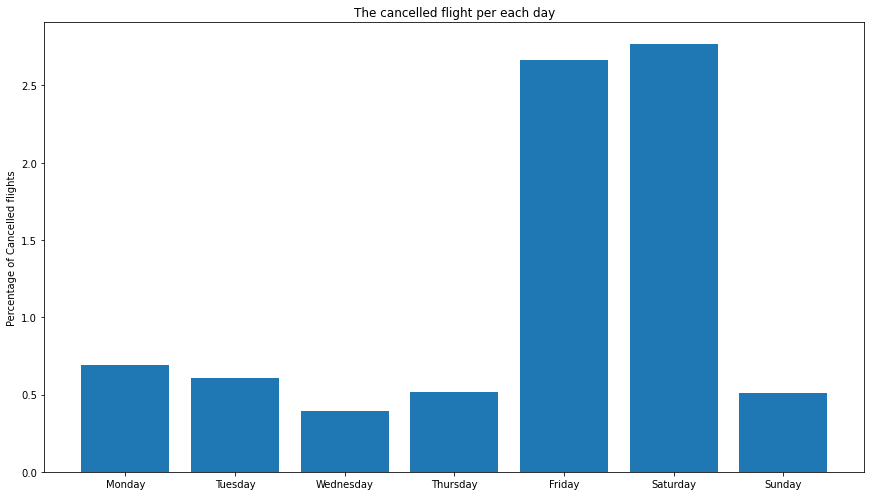

In [29]:
days_cancelled = df_cancelled['CANCELLED'].groupby(df['DAY_OF_WEEK']).count()
days_total = df['CANCELLED'].groupby(df['DAY_OF_WEEK']).count()
days_fraction = np.divide(days_cancelled, days_total)
x_values= days_fraction.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (14.70, 8.27))
ax.bar(x_values,days_fraction*100, align='center')
ax.set_xticks(x_values)
ax.set_xticklabels(week)
ax.set_title("The cancelled flight per each day")
ax.set_ylabel('Percentage of Cancelled flights');

>There is relationship between cancelled flights and day of weak, the most cancellation flights occuer in weekends.

### Numirc values about all delays Flights

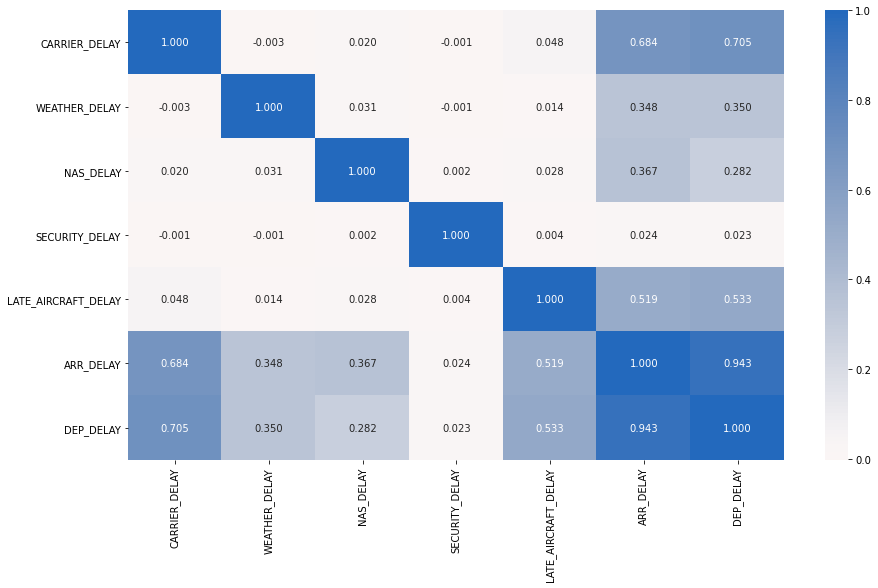

In [30]:
delay_col=['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','ARR_DELAY','DEP_DELAY']
plt.figure(figsize=[14.70, 8.27])
sb.heatmap(df[delay_col].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0);
plt.show()

> 0.9 and above indicate very highly correlated, 0.7-0.9 indicate variables highly correlated, 0.5-0.7 indicate variables moderately correlated, 0.3-0.5 indicate low correlation, 0-0.3 have little correlation
which means that there is very high correlated relationship between arrival delays and departure delays.

### comparing the total flights with delayed flights  in 10 Origin airports 

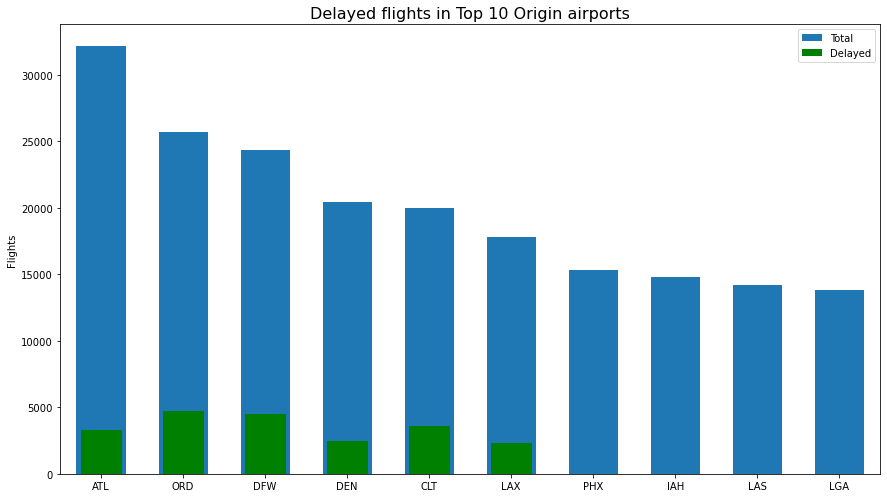

In [31]:
plt.figure(figsize=[14.70, 8.27])
gen_counts = df['ORIGIN'].value_counts()[:10]
delayed_gen_counts = delayed_df['ORIGIN'].value_counts()[:10]
gen_counts.plot.bar(label='Total', width=.6)

delayed_gen_counts.reindex(gen_counts.index).plot.bar(label='Delayed', color='green')
locs, labels = plt.xticks() 
plt.legend()
plt.xticks(rotation=0)
plt.title('Delayed flights in Top 10 Origin airports', fontsize=16);
plt.ylabel('Flights');

> * from this plot we can see that ORD Origin have the most delayed flights comparing with the total flights their.
> * PHX, IAH,LAS and LGA doesn't have any delayed flights!
 

## Multivariate Exploration

> What is the relationship between day of the week and delay in departure with the cancellation causes?

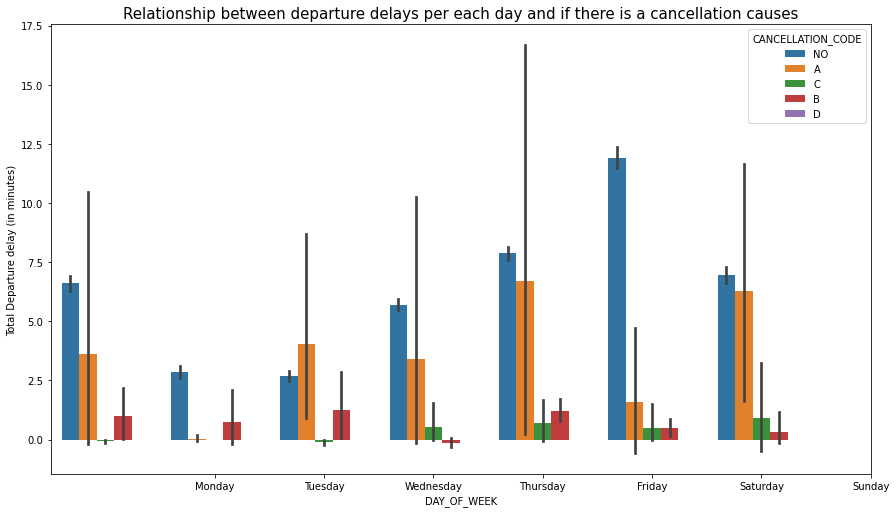

In [32]:
# the cancellation code refrence to these delay reasons(A: Carrier, B: Weather, 
# C: National Air System, D: Security)
plt.figure(figsize=[14.70, 8.27])
x_values= days_fraction.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sb.barplot(data = df, x = 'DAY_OF_WEEK', y = 'DEP_DELAY', hue = 'CANCELLATION_CODE');
ax.set_ylabel('Total Departure delay (in minutes)')
ax.set_xticks(x_values)
ax.set_xticklabels(week)
ax.set_title("Relationship between departure delays per each day and if there is a cancellation causes",fontsize=15);

#plt.legend(['No cancel','CARRIER','WEATHER','NAS','SECURITY'],bbox_to_anchor=(1, 1))
# ^ if i put this code the color in the legend change from the color inside the plot!

>From this plot, we can see that there are many delays without cancellation on the weekends.
also, we can saw from this plot is that the most frequent delay reason is carrier delay besides many of these flights don't cancel.



#### What is the relationship between Origin and departure delay in each day of week

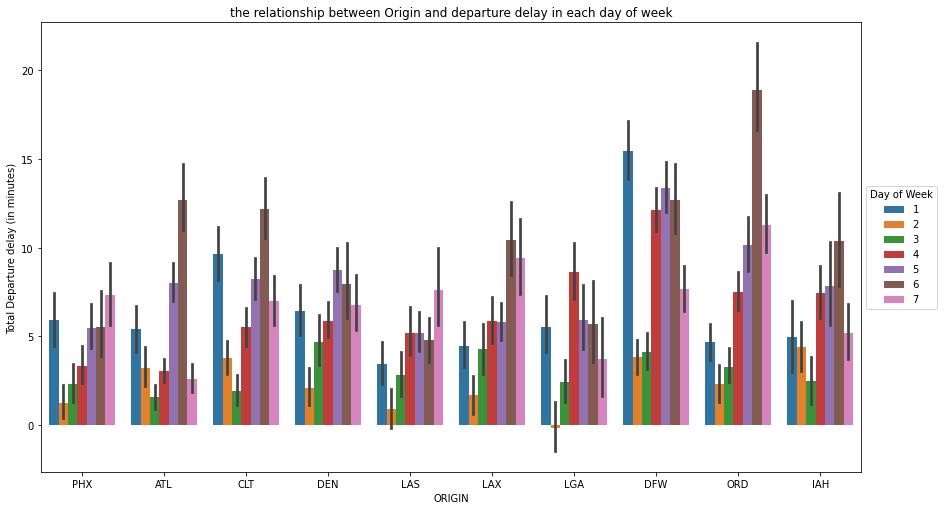

In [33]:
plt.figure(figsize=[14.70, 8.27])
top = (df.ORIGIN.value_counts()[0:10].index)
ax = sb.barplot(data = df[df.ORIGIN.isin(top)], x= 'ORIGIN', y = 'DEP_DELAY', hue = 'DAY_OF_WEEK')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Day of Week');
ax.set_title('the relationship between Origin and departure delay in each day of week')
ax.set_ylabel('Total Departure delay (in minutes)');

> * we can see that in the weekdays usualy the delays is less than the weekend days an all Origin.

#### What is the relationship between day of the week and delay in departure with diverted flights?

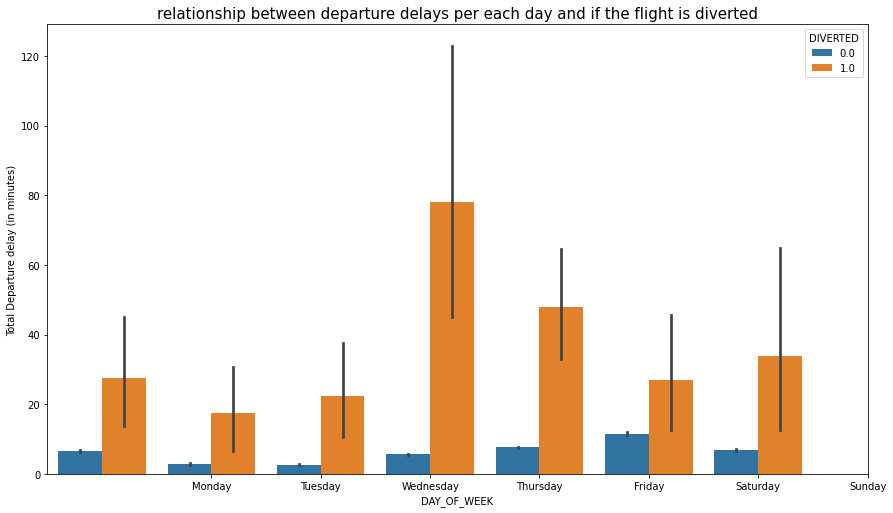

In [34]:
plt.figure(figsize=[14.70, 8.27])
ax = sb.barplot(data = df, x = 'DAY_OF_WEEK', y = 'DEP_DELAY', hue = 'DIVERTED')
x_values= days_fraction.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_title("relationship between departure delays per each day and if the flight is diverted",fontsize=15)
ax.legend(loc= 'upper right', title = 'DIVERTED');
ax.set_xticks(x_values)
ax.set_xticklabels(week)
ax.set_ylabel('Total Departure delay (in minutes)');

> from this plot we can see that there are the most flights which delays, are diverted 
only few flights delays and continue in the same way